        QUESTION 2 - USER CLASSIFICATION USING KNN

In [ ]:
import pandas as pd
dataset_path = "dataset1.csv"
df = pd.read_csv(dataset_path)
df = df[['Text', 'Username']]

In [22]:
from sklearn.model_selection import train_test_split

X = df['Text']  # Features
y = df['Username']  # Target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_vectorized)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.021897810218978103
Precision: 0.022483650272244447
Recall: 0.021897810218978103
F1-Score: 0.02039687434090701


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


        QUESTION 3 - CLUSTERING

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [26]:
text_data = df['Text']

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

In [27]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [28]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.0037966887340400513


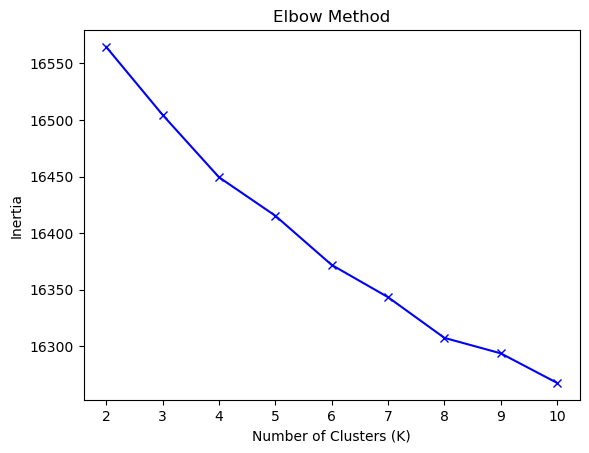

In [3]:
# Perform K-Means clustering for different values of K
k_values = range(2, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

        CLUSTERING METHOD 2

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/student/a

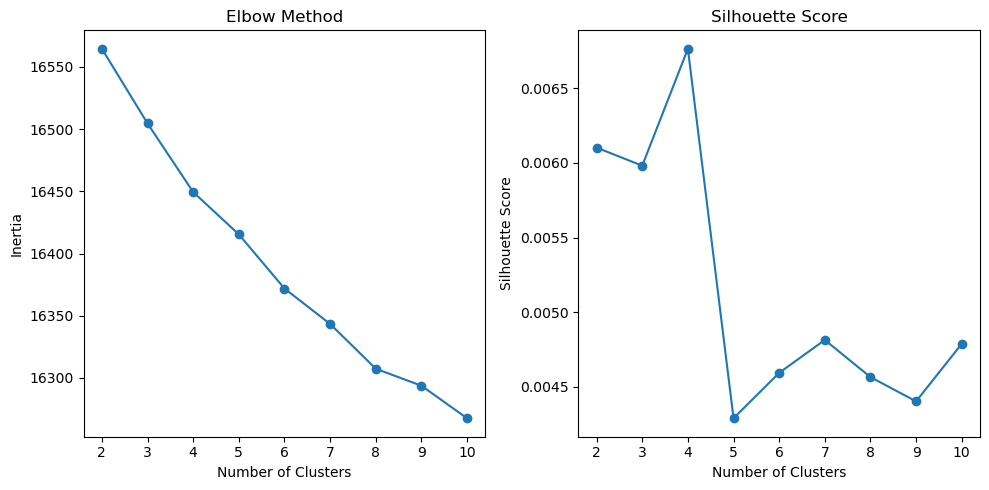

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
22       @paulgp leverage chatgpt…you will be surprised...
150      saved from chatgpt... before it changes writin...
166      can you take new ai tech #chatgpt seriously if...
194      @shillin_villian yo, have you tried @quickieai...
242      @openai using chatgpt feels like you are chatt...
                               ...                        
49788    @zomato \ncontent for you ..\n\nme: best place...
49875    content for you @zomato \n\nme: best place to ...
49878    @darma15206038 @budgieofdespair @brianferoldi ...
49921    @jobartleynz suggest you get chatgpt to write ...
49967    @robhope you know you've made it when chatgpt ...
Name: Text, Length: 1487, dtype: object

Cluster 1:
65       @shillin_villian learn chat gpt means learn te...
92                 @shillin_villian chat gpt is the future
213            @kantrowitz he's being replaced by chat gpt
227        @jiei_yushi chat gpt is not that intelligent :p
237      @chatgptbot @iivdfo ليه بدون كومنت ؟\nناقص 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data_path = "dataset1.csv"
df = pd.read_csv(data_path)

# Drop irrelevant columns
df = df[['Text', 'Language', 'hashtag', 'MentionedUsers']]

# Perform data cleaning and preprocessing

# Remove rows with missing values
df = df.dropna()

# Remove duplicate tweets
df = df.drop_duplicates(subset='Text')

# Text preprocessing (you can add more steps based on your requirements)
df['Text'] = df['Text'].str.lower()  # Convert text to lowercase

# Define the feature set
features = df['Text']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette = []
max_clusters = 10  # Maximum number of clusters to try

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Plotting the elbow method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on the elbow method and silhouette score, choose the optimal number of clusters
n_clusters = 5  # Adjust this value based on the plot and your judgment

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Display the clusters and their corresponding tweets
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Text'])
    print()

# Evaluate the clustering algorithm (silhouette score)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Average Silhouette Score: {silhouette_avg:.3f}")


        QUESTION 4 - ENGAGEMENT PREDICTION

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv("dataset1.csv")
X = df[['Text', 'Language']]
y_retweets = df['RetweetCount']
y_likes = df['LikeCount']
y_replies = df['ReplyCount']

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for engagement prediction
X_train, X_test, y_retweets_train, y_retweets_test = train_test_split(X, y_retweets, test_size=0.2, random_state=42)
X_train, X_test, y_likes_train, y_likes_test = train_test_split(X, y_likes, test_size=0.2, random_state=42)
X_train, X_test, y_replies_train, y_replies_test = train_test_split(X, y_replies, test_size=0.2, random_state=42)

In [34]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

X_train_text_vectorized = vectorizer.transform(X_train['Text'])
X_test_text_vectorized = vectorizer.transform(X_test['Text'])

X_train_combined = np.hstack((X_train_text_vectorized.toarray(), X_train['Language'].values.reshape(-1, 1)))
X_test_combined = np.hstack((X_test_text_vectorized.toarray(), X_test['Language'].values.reshape(-1, 1)))

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_text_vectorized = vectorizer.fit_transform(X_train['Text'])
X_test_text_vectorized = vectorizer.transform(X_test['Text'])

# Perform one-hot encoding on the 'Language' column
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_language_encoded = encoder.fit_transform(X_train['Language'].values.reshape(-1, 1))
X_test_language_encoded = encoder.transform(X_test['Language'].values.reshape(-1, 1))

# Combine the vectorized text data with the encoded 'Language' column
X_train_combined = np.hstack((X_train_text_vectorized.toarray(), X_train_language_encoded))
X_test_combined = np.hstack((X_test_text_vectorized.toarray(), X_test_language_encoded))

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
# USING NAIVE BAYES

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_combined, y_likes_train)
y_likes_pred = nb_classifier.predict(X_test_combined)
likes_accuracy = accuracy_score(y_likes_test, y_likes_pred.round())
print("Accuracy: ", likes_accuracy)

Accuracy:  0.5428457154284572


In [ ]:
# USING RANDOM FORSEST FOR PREDICTING NO. OF TWEETS

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_combined, y_retweets_train)
y_retweets_pred = rf_regressor.predict(X_test_combined)
retweets_accuracy = accuracy_score(y_retweets_test, y_retweets_pred.round())
print("Random Forest Accuracy (Retweets):", retweets_accuracy)

        QUESTION 5 - HASHTAG ANALYSIS

In [ ]:
import pandas as pd
dataset_path = "dataset1.csv"
df = pd.read_csv(dataset_path)

df = df[['Text', 'hashtag', 'hastag_counts']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and target variable (y)
X = df['Text']
y = df['hashtag']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Use Bag-of-Words
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_vectorized)

# Get the predicted cluster labels for the testing set
predicted_clusters = kmeans.predict(X_test_vectorized)

In [5]:
from sklearn.naive_bayes import MultinomialNB

# Apply Naive Bayes classification
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

# Get the predicted hashtags for the testing set
predicted_hashtags = naive_bayes.predict(X_test_vectorized)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Apply Naive Bayes classification
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

# Get the predicted hashtags for the testing set
predicted_hashtags = naive_bayes.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_hashtags)
print("Accuracy:", accuracy)

# Generate classification report
classification_report = classification_report(y_test, predicted_hashtags)
print("Classification Report:")
print(classification_report)

        QUESTION 1 - SENTIMENT ANALYSIS

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('dataset1.csv')

# Perform data cleaning and pre-processing if required
# You can handle missing values, remove unnecessary columns, etc.
# For sentiment analysis, we'll focus on 'Text' and 'Language' columns, so you can drop the rest if they are not needed
df = df[['Text', 'Language']]

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
# Define the feature set (X) and target variable (y)
X_train = train_df['Text']
y_train = train_df['Language']

X_test = test_df['Text']
y_test = test_df['Language']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Loading the Dataset and Data Cleaning
df = pd.read_csv('dataset1.csv')
df = df[['Text', 'Language']]

# Step 2: Splitting the Dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 3: Defining the Feature Set and Target Variable
X_train = train_df['Text']
y_train = train_df['Language']

X_test = test_df['Text']
y_test = test_df['Language']

# Step 4: Vectorizing the Text Data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Building and Training the Model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)

# Step 6: Making Predictions on the Test Set
y_pred = rf_classifier.predict(X_test_vectorized)

# Step 7: Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"\nClassification Report:\n{classification_rep}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Loading the Dataset and Data Cleaning
df = pd.read_csv('dataset1.csv')
df = df[['Text', 'Language']]

# Step 2: Splitting the Dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 3: Defining the Feature Set and Target Variable
X_train = train_df['Text']
y_train = train_df['Language']

X_test = test_df['Text']
y_test = test_df['Language']

# Step 4: Vectorizing the Text Data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Building and Training the Model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)

# Step 6: Making Predictions on the Test Set
y_pred = rf_classifier.predict(X_test_vectorized)

# Step 7: Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"\nClassification Report:\n{classification_rep}")

# Sentiment Prediction for User Input
user_input = input("Enter a statement: ")
user_input_vectorized = vectorizer.transform([user_input])
sentiment_prediction = rf_classifier.predict(user_input_vectorized)

print(f"Sentiment Prediction: {sentiment_prediction[0]}")

        QUESTION 1 - METHOD 2 (NOT WORKING)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset into a pandas DataFrame
data = pd.read_csv('dataset1.csv')

# Drop rows with missing values in the 'Language' column
data = data.dropna(subset=['Language'])

# Replace any remaining missing values in the target variable column
data['Language'].fillna('unknown', inplace=True)

# Split the dataset into a training set and a testing set
X = data['Text']  # Feature set
y = data['Language']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert sentiment labels to numerical values
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0, 'unknown': 2}
y_train_numeric = y_train.map(sentiment_mapping)
y_test_numeric = y_test.map(sentiment_mapping)

# Train a Random Forest classifier on the training data
classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train_numeric)

# Predict the sentiment of tweets and evaluate the model
y_pred = classifier.predict(X_test_vectorized)
report = classification_report(y_test_numeric, y_pred)
print(report)

# Predict the probability of positive, negative, and neutral tweets
y_pred_proba = classifier.predict_proba(X_test_vectorized)

# Correlate the predicted probabilities using a plot or other visualization methods

# Define a function to predict sentiment based on user input
def predict_sentiment(statement):
    statement_vectorized = vectorizer.transform([statement])
    sentiment_mapping_inverse = {v: k for k, v in sentiment_mapping.items()}
    sentiment = sentiment_mapping_inverse[classifier.predict(statement_vectorized)[0]]
    return sentiment

# Test the predict_sentiment function
user_input = input("Enter a statement: ")
prediction = predict_sentiment(user_input)
print("Predicted sentiment:", prediction)

        QUESTION 1 - METHOD 3 (GIVEN IN PAPER)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')


# Data cleaning and preprocessing
df['Text'] = df['Text'].str.lower()  # Convert text to lowercase
df['Text'] = df['Text'].str.replace('[^\w\s]', '')  # Remove punctuation
df = df[['Text', 'Language']].dropna()  # Keep only relevant columns and drop rows with missing values

# Sentiment analysis using NLTK's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] > 0:
        return 'positive'
    elif sentiment_scores['compound'] < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Text'].apply(get_sentiment)

# Combine the text and target variables
X = df['Text']
y = df['Language']

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the training and test sets for label encoding
combined_labels = pd.concat([y_train, y_test])
le = LabelEncoder()
combined_labels_encoded = le.fit_transform(combined_labels)

# Split the label-encoded data back into training and test sets
y_train_encoded = combined_labels_encoded[:len(y_train)]
y_test_encoded = combined_labels_encoded[len(y_train):]

# Vectorize the text data using TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the testing set
predictions = nb_classifier.predict(X_test_tfidf)

# Decode the predictions
predictions_decoded = le.inverse_transform(predictions)

# Evaluate the model
print(classification_report(y_test, predictions_decoded))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/j_/pkfzpv5x4xv9mb1gxwdtxsrr0000gn/T/ipykernel_1510/4255330702.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')  # Remove punctuation


              precision    recall  f1-score   support

          ar       1.00      0.52      0.69        82
          bn       0.00      0.00      0.00         1
          ca       0.00      0.00      0.00        29
          cs       0.00      0.00      0.00         8
          cy       0.00      0.00      0.00        16
          da       0.00      0.00      0.00        10
          de       1.00      0.85      0.92       234
          el       0.00      0.00      0.00        11
          en       0.79      1.00      0.88      6428
          es       0.92      0.96      0.94       666
          et       0.00      0.00      0.00         4
          fa       1.00      0.55      0.71        29
          fi       0.00      0.00      0.00        17
          fr       0.99      0.89      0.94       491
          hi       0.00      0.00      0.00        13
          ht       0.00      0.00      0.00         4
          hu       0.00      0.00      0.00         4
          in       0.00    

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---